# Homework 3 Programming Exercises

## 1. ConvolutionalNeuralNetworks

### (a) LoadingDataset

In [6]:
import keras 
keras.__version__

'2.4.3'

In [7]:
from keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [8]:
print("shape of train set: ", train_X.shape, train_Y.shape)
print("shape of test set: ", test_X.shape, test_Y.shape)

shape of train set:  (60000, 28, 28) (60000,)
shape of test set:  (10000, 28, 28) (10000,)


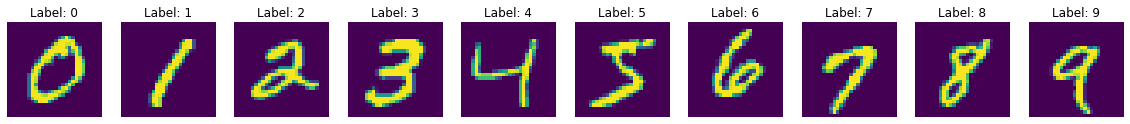

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
_, axes = plt.subplots(1, 10)
zero_nine_index = [[] for i in range(10)] # create a new array 
for index, digit in enumerate(train_Y):
    zero_nine_index[digit].append(index)
for dig, ax in enumerate(axes):
    ax.set_axis_off()
    ax.imshow(train_X[zero_nine_index[dig][0]])
    ax.set_title('Label: %d' % dig)

### (b). preprocessing

In [10]:
# b. preprocessing
def preprocessing (X, Y):
    import keras
    Y = keras.utils.to_categorical(Y, num_classes=None, dtype="float32")
    # Normalize the data. scale the pixel values such that they lie between 0.0 and 1.0.
    X = X.reshape(-1,28,28,1).astype("float32") / 255.0
    return X, Y

train_X, train_Y = preprocessing(train_X, train_Y)
test_X, test_Y = preprocessing(test_X, test_Y)
# show_0_to_9 (train_X, train_Y)

print("shape of train set: ", train_X.shape, train_Y.shape)
print("shape of test set: ", test_X.shape, test_Y.shape)

shape of train set:  (60000, 28, 28, 1) (60000, 10)
shape of test set:  (10000, 28, 28, 1) (10000, 10)


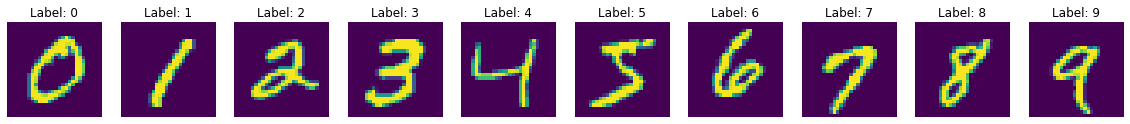

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 10]
_, axes = plt.subplots(1, 10)
zero_nine_index = [[] for i in range(10)] # create a new array 
for index, digit_bits in enumerate(train_Y): # store the position for each digit. eg. digit = 0 go into zero_nine_index[0]
    digit = int(np.where(digit_bits == 1)[0])
    zero_nine_index[digit].append(index)
for dig, ax in enumerate(axes):
    ax.set_axis_off()
    ax.imshow(train_X[zero_nine_index[dig][0]][:,:,0])
    ax.set_title('Label: %d' % dig)

### (c) Implementation

In [12]:
# c.Implementation

from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dense
from keras.layers import Flatten 
from keras.optimizers import SGD
def create_cnn():
    # define using Sequential
    model = Sequential ()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3),
        activation='relu', 
        kernel_initializer='he_uniform', 
        input_shape=(28, 28, 1))
        )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(
        Dense (100 ,
        activation='relu', 
        kernel_initializer='he_uniform') )
    model.add(Dense(10, activation='softmax'))
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy', 
        metrics=['accuracy']
        )
    return model

model = create_cnn()
model.layers

### (d) TrainingandEvaluatingCNN

In [13]:
print("shape of train set: ", train_X.shape, train_Y.shape)
model = create_cnn()
model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score = model.evaluate(test_X, test_Y, verbose=0)

shape of train set:  (60000, 28, 28, 1) (60000, 10)
Epoch 1/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1914 - accuracy: 0.9421 - val_loss: 0.0744 - val_accuracy: 0.9785
Epoch 2/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0628 - accuracy: 0.9814 - val_loss: 0.0574 - val_accuracy: 0.9833
Epoch 3/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0383 - accuracy: 0.9887 - val_loss: 0.0498 - val_accuracy: 0.9863
Epoch 4/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0500 - val_accuracy: 0.9860
Epoch 5/10
1688/1688 [==============================] - 19s 12ms/step - loss: 0.0179 - accuracy: 0.9947 - val_loss: 0.0472 - val_accuracy: 0.9872
Epoch 6/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0435 - val_accuracy: 0.9885
Epoch 7/10
1688/1688 [==============================] - 20s 12ms/step - 

In [14]:
print(score)

[0.04268517717719078, 0.9883999824523926]


### (e) Experimentation

#### i. Run the above training for 50 epochs.

In [183]:
# experimentation
model = create_cnn()
epoch_history = model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1792 - accuracy: 0.9451 - val_loss: 0.0757 - val_accuracy: 0.9785
Epoch 2/50
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0634 - accuracy: 0.9807 - val_loss: 0.0588 - val_accuracy: 0.9818
Epoch 3/50
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0521 - val_accuracy: 0.9868
Epoch 4/50
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0487 - val_accuracy: 0.9875
Epoch 5/50
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0205 - accuracy: 0.9938 - val_loss: 0.0482 - val_accuracy: 0.9870
Epoch 6/50
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.0560 - val_accuracy: 0.9867
Epoch 7/50
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.0558 - 

In [184]:
# print validation and training accuracy over epochs
print(epoch_history.history['accuracy']) # the accuracy of a batch of training data 
print(epoch_history.history['val_accuracy']) # accuracy computed on the validation set 

[0.9450926184654236, 0.9806851744651794, 0.9873889088630676, 0.9912592768669128, 0.993759274482727, 0.9962592720985413, 0.9971666932106018, 0.9984999895095825, 0.9994074106216431, 0.9996111392974854, 0.9997777938842773, 0.9999444484710693, 0.9999814629554749, 0.9999814629554749, 1.0, 0.9999814629554749, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9785000085830688, 0.9818333387374878, 0.9868333339691162, 0.987500011920929, 0.9869999885559082, 0.9866666793823242, 0.9871666431427002, 0.9890000224113464, 0.9881666898727417, 0.9900000095367432, 0.9898333549499512, 0.9900000095367432, 0.9894999861717224, 0.9896666407585144, 0.9900000095367432, 0.9891666769981384, 0.9891666769981384, 0.9894999861717224, 0.9894999861717224, 0.9893333315849304, 0.9891666769981384, 0.9891666769981384, 0.9891666769981384, 0.9893333315849304, 0.9891666769981384, 0.9890000224113464, 0.989

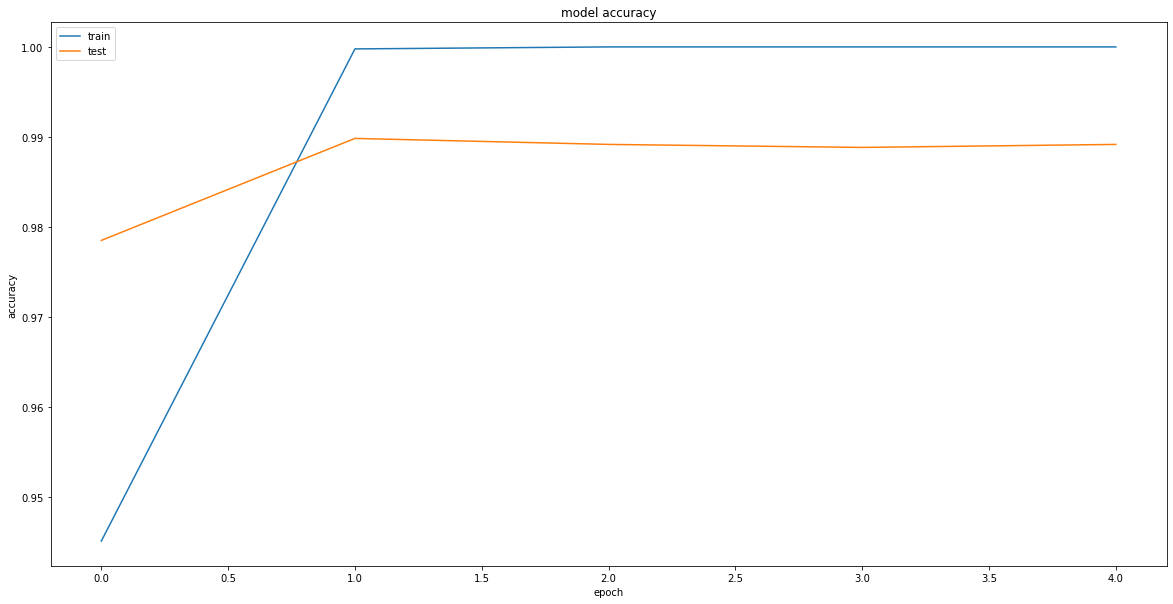

In [197]:
import matplotlib.pyplot as plt
import numpy

plt.plot(epoch_history.history['accuracy'][::10])
# [::10] plot each 10th points out of history['accuracy']
plt.plot(epoch_history.history['val_accuracy'][::10])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### ii. Adding dropout

In [15]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.optimizers import SGD
def create_cnn_dropout():
    # define using Sequential
    model = Sequential ()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3),
        activation='relu', 
        kernel_initializer='he_uniform', 
        input_shape=(28, 28, 1))
        )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(
        Dense (100 ,
        activation='relu', 
        kernel_initializer='he_uniform') )
    model.add(Dense(10, activation='softmax'))
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy', 
        metrics=['accuracy']
        )
    return model


In [16]:
model_2 = create_cnn_dropout()
epoch_history_2 = model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0456 - val_accuracy: 0.9908
Epoch 2/50
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0480 - val_accuracy: 0.9907
Epoch 3/50
1688/1688 [==============================] - 18s 10ms/step - loss: 9.6474e-04 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9898
Epoch 4/50
1688/1688 [==============================] - 19s 11ms/step - loss: 7.5239e-04 - accuracy: 0.9999 - val_loss: 0.0490 - val_accuracy: 0.9905
Epoch 5/50
1688/1688 [==============================] - 17s 10ms/step - loss: 5.6180e-04 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 0.9900
Epoch 6/50
1688/1688 [==============================] - 17s 10ms/step - loss: 4.8465e-04 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9900
Epoch 7/50
1688/1688 [==============================] - 20s 12ms/step - loss: 4.3006e-04 - accuracy: 1.0000 -

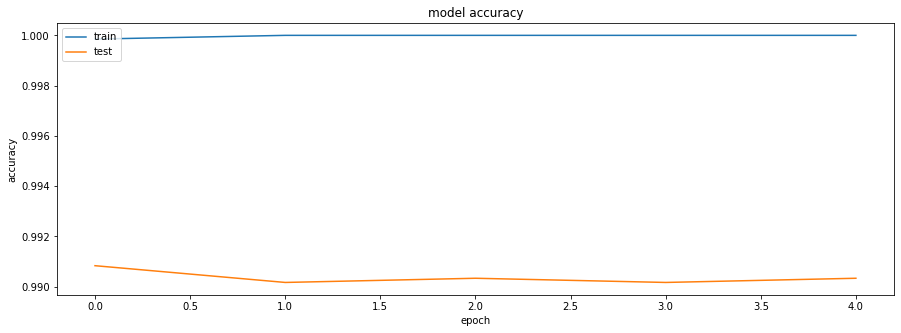

In [17]:
import matplotlib.pyplot as plt
import numpy

plt.rcParams['figure.figsize'] = [15, 5]

plt.plot(epoch_history_2.history['accuracy'][::10])
# [::10] plot each 10th points out of history['accuracy']
plt.plot(epoch_history_2.history['val_accuracy'][::10])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### iii. Adding convolution layer

In [192]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.optimizers import SGD
def create_cnn_3():
    # define using Sequential
    model = Sequential ()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3),
        activation='relu', 
        kernel_initializer='he_uniform', 
        input_shape=(28, 28, 1))
        )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    
    # Convolution layer
    model.add(
        Conv2D(64, (3, 3),
        activation='relu', 
        kernel_initializer='he_uniform', 
        input_shape=(28, 28, 1))
        )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten output
    model.add(Flatten())
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(
        Dense (100 ,
        activation='relu', 
        kernel_initializer='he_uniform') )
    model.add(Dense(10, activation='softmax'))
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy', 
        metrics=['accuracy']
        )
    return model


In [193]:
model_3 = create_cnn_3()
epoch_history_3 = model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.1769e-05 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9892
Epoch 2/10
1688/1688 [==============================] - 13s 8ms/step - loss: 2.1579e-05 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9890
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.1451e-05 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9890
Epoch 4/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.1287e-05 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9892
Epoch 5/10
1688/1688 [==============================] - 13s 8ms/step - loss: 2.1108e-05 - accuracy: 1.0000 - val_loss: 0.0784 - val_accuracy: 0.9892
Epoch 6/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.0957e-05 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9892
Epoch 7/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.0799e-05 - accuracy: 1.0000

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print(score)

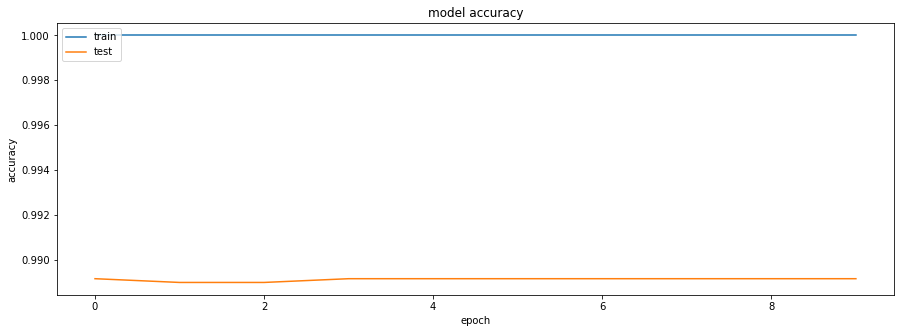

In [217]:
import matplotlib.pyplot as plt
import numpy

plt.plot(epoch_history_3.history['accuracy'])
plt.plot(epoch_history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### iv. Changing learning rate

In [226]:
# e-4 learning rate 0.001
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.optimizers import SGD
def create_cnn_4():
    # define using Sequential
    model = Sequential ()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3),
        activation='relu', 
        kernel_initializer='he_uniform', 
        input_shape=(28, 28, 1))
        )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    
    # Convolution layer
    model.add(
        Conv2D(64, (3, 3),
        activation='relu', 
        kernel_initializer='he_uniform', 
        input_shape=(28, 28, 1))
        )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten output
    model.add(Flatten())
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(
        Dense (100 ,
        activation='relu', 
        kernel_initializer='he_uniform') )
    model.add(Dense(10, activation='softmax'))
    # initialize optimizer
    opt = SGD(lr=0.001, momentum=0.9)
    # compile model
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy', 
        metrics=['accuracy']
        )
    return model

model_4_1 = create_cnn_4_1()
epoch_history_4_1 = model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 25s 15ms/step - loss: 1.7396e-05 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9892
Epoch 2/10
1688/1688 [==============================] - 24s 14ms/step - loss: 1.7268e-05 - accuracy: 1.0000 - val_loss: 0.0798 - val_accuracy: 0.9892
Epoch 3/10
1688/1688 [==============================] - 21s 12ms/step - loss: 1.7162e-05 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9892
Epoch 4/10
1688/1688 [==============================] - 25s 15ms/step - loss: 1.7051e-05 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9892
Epoch 5/10
1688/1688 [==============================] - 28s 17ms/step - loss: 1.6957e-05 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9892
Epoch 6/10
1688/1688 [==============================] - 20s 12ms/step - loss: 1.6839e-05 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9892
Epoch 7/10
1688/1688 [==============================] - 21s 12ms/step - loss: 1.6735e-05 - accuracy:

In [227]:
# e-4 learning rate 0.1
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.optimizers import SGD
def create_cnn_4_2():
    # define using Sequential
    model = Sequential ()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3),
        activation='relu', 
        kernel_initializer='he_uniform', 
        input_shape=(28, 28, 1))
        )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    
    # Convolution layer
    model.add(
        Conv2D(64, (3, 3),
        activation='relu', 
        kernel_initializer='he_uniform', 
        input_shape=(28, 28, 1))
        )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten output
    model.add(Flatten())
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(
        Dense (100 ,
        activation='relu', 
        kernel_initializer='he_uniform') )
    model.add(Dense(10, activation='softmax'))
    # initialize optimizer
    opt = SGD(lr=0.1, momentum=0.9)
    # compile model
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy', 
        metrics=['accuracy']
        )
    return model

model_4_2 = create_cnn_4_2()
epoch_history_4_2 = model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 22s 13ms/step - loss: 1.6317e-05 - accuracy: 1.0000 - val_loss: 0.0804 - val_accuracy: 0.9892
Epoch 2/10
1688/1688 [==============================] - 18s 11ms/step - loss: 1.6217e-05 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9892
Epoch 3/10
1688/1688 [==============================] - 20s 12ms/step - loss: 1.6118e-05 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9892
Epoch 4/10
1688/1688 [==============================] - 18s 11ms/step - loss: 1.6041e-05 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9892
Epoch 5/10
1688/1688 [==============================] - 21s 12ms/step - loss: 1.5923e-05 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 0.9892
Epoch 6/10
1688/1688 [==============================] - 22s 13ms/step - loss: 1.5830e-05 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9892
Epoch 7/10
1688/1688 [==============================] - 25s 15ms/step - loss: 1.5739e-05 - accuracy:

### (f) Analysis

#### i. Explain how the trends in validation and train accuracy change after using the dropout layer in the experiments.

Before using the dropout layer in the experiments, the trend in validation and train accuracy is first going up and then towards stability. After using the dropout layer in the experiments, both validation and train accuracy are able to quickly reach a stable state at the beginning of the stage


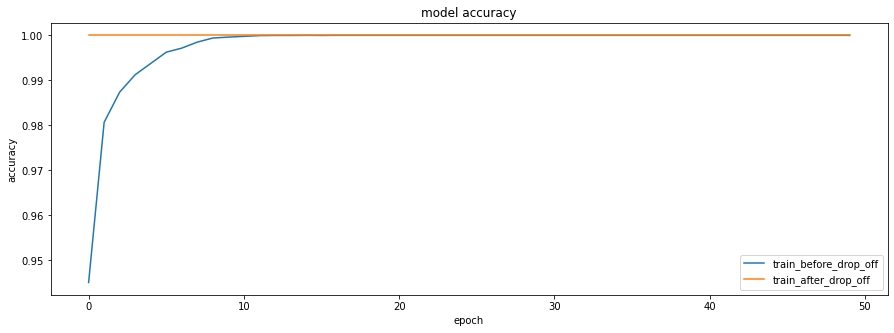

In [214]:
import matplotlib.pyplot as plt
import numpy
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history_2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy_before_drop_off', 'train_accuracy_after_drop_off'])
plt.show()

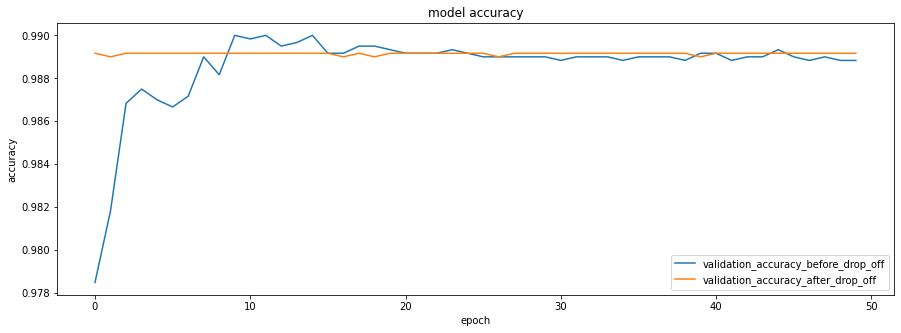

In [220]:
import matplotlib.pyplot as plt
import numpy
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(epoch_history.history['val_accuracy'])
plt.plot(epoch_history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation_accuracy_before_drop_off', 'validation_accuracy_after_drop_off'])
plt.show()

#### ii. How does the performance of CNN with two convolution layers differ as compared to CNN with a single convolution layer in your experiments?

In terms of training accuracy, both CNN with two convolution layers and  CNN with a single convolution layer are equal to 1 constantly so there isn't much difference between them. 
However, adding an additional layer seems to be less accurate at the first four epochs based on the experiments on validation accuracy so adding more layers doesn't necessarily result in higher accuracy in the validation dataset. 

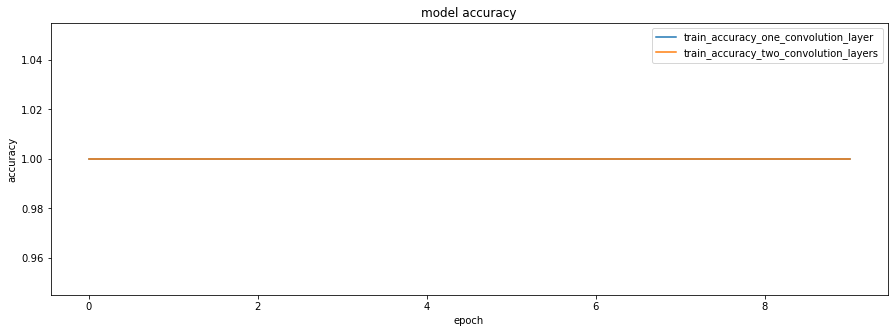

In [224]:
import matplotlib.pyplot as plt
import numpy
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(epoch_history_2.history['accuracy'][:10])
plt.plot(epoch_history_3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy_one_convolution_layer', 'train_accuracy_two_convolution_layers'])
plt.show()

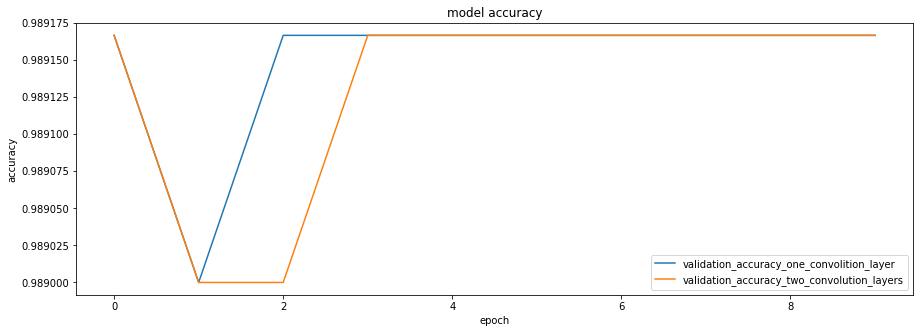

In [223]:
import matplotlib.pyplot as plt
import numpy
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(epoch_history_2.history['val_accuracy'][:10])
plt.plot(epoch_history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation_accuracy_one_convolition_layer', 'validation_accuracy_two_convolution_layers'])
plt.show()

#### iii. How did changing learning rates change your experimental results in part(iv)?

Changing the learning rates from 0.01 to 0.001 or 0.1 improves the accuracy at the first four epochs by at most 0.02% in validation accuracy. However, based on the experiment, there is no difference between the accuracy when the learning rate is 0.001 and 0.1. There is no difference in accuracy in training accuracy, either.

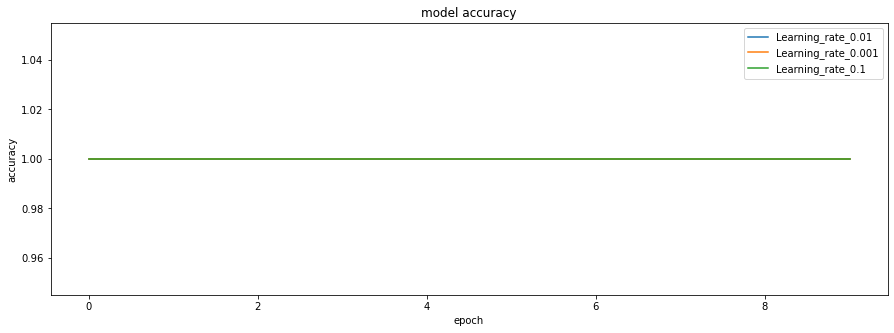

In [228]:
import matplotlib.pyplot as plt
import numpy
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(epoch_history_3.history['accuracy'])
plt.plot(epoch_history_4_1.history['accuracy'])
plt.plot(epoch_history_4_2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Learning_rate_0.01', 
            'Learning_rate_0.001',
            'Learning_rate_0.1'])
plt.show()

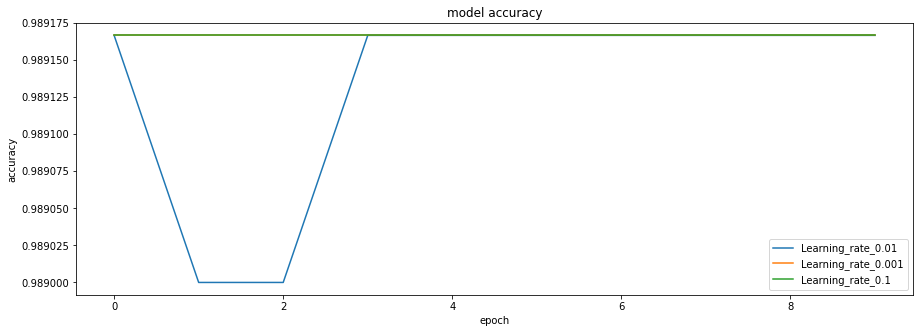

In [229]:
import matplotlib.pyplot as plt
import numpy
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(epoch_history_3.history['val_accuracy'])
plt.plot(epoch_history_4_1.history['val_accuracy'])
plt.plot(epoch_history_4_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Learning_rate_0.01', 
            'Learning_rate_0.001',
            'Learning_rate_0.1'])
plt.show()